<a href="https://colab.research.google.com/github/franz6ko/deep-learning/blob/main/Ejercicios_para_entregar_a_la_mitad_del_cursado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 1 - Stochastic Gradient Descent

## Vanila SGD

a) Implementar en Python un algoritmo basado en Stochastic Gradient Descent
para encontrar numéricamente el mínimo de 𝑦 = (𝑥 − 2)**2 + 3. ¿Cuál es
el mínimo valor que encontró el algoritmo y para qué valor de x? ¿En qué
momento detuviste la búsqueda y por qué? ¿Cómo inicializamos los valores
random del algoritmo y cómo afectan la convergencia? ¿Cuáles son los hiper
parámetros del algoritmo?


In [ ]:
def f(x):
  return (x - 2)**2 + 3

def fp(x):
  return 2*(x - 2)

Min: 1.9955791235866507


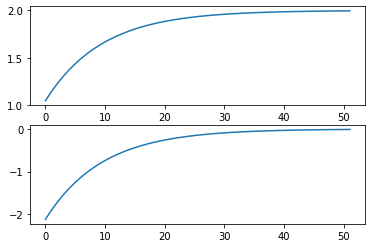

In [ ]:
alpha = 0.05
tol = 0.01

x = np.random.rand()
g = 1

hist_x = []
hist_g = []

while abs(g) > tol:
  g = fp(x)
  x = x - alpha * g
  hist_x.append(x)
  hist_g.append(g)

fig, axs = plt.subplots(2)
axs[0].plot(hist_x)
axs[1].plot(hist_g)

print("Min: " + str(x))

Se detuvo la búsqueda aplicando una tolerancia al valor absoluto del gradiente. Cuando el mismo es lo suficientemente chico, consideramos que estamos muy cerca del mínimo de la función y detenemos el bucle.

El único valor que se inicializa aleatoreamente es un valor inicial de x. Para ello usamos la funcion np.random.rand() que devuelve valores entre [0,1).

Los hiperparámetros del algoritmo son el alpha y el valor de tolerancia para la detención.

## SGD + momento de 1er orden

b) Agregar al algoritmo del punto (a) un momento de primer orden. ¿Cuáles son
los hiper parámetros del algoritmo?

Min: 1.9980161434733474


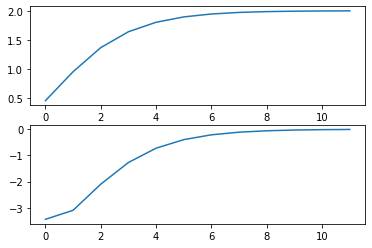

In [ ]:
alpha = 0.05
tol = 0.01
sigma = 0.1

x = np.random.rand()
g = 1
gb = 0

hist_x = []
hist_g = []

while abs(g) > tol:
  g = fp(x)
  x = x - alpha * g - sigma * gb
  gb = g
  hist_x.append(x)
  hist_g.append(g)

fig, axs = plt.subplots(2)
axs[0].plot(hist_x)
axs[1].plot(hist_g)

print("Min: " + str(x))

Los hiperparámetros del algoritmo ahora son: aplha, la tolerancia y sigma.

## SGD + momento de 2do orden

c) Agregar al algoritmo del punto (b) un momento de segundo orden. ¿Cuáles
son los hiper parámetros del algoritmo?

Min: 2.006691069571183


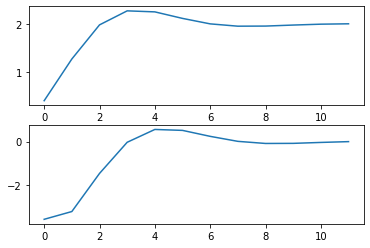

In [ ]:
alpha = 0.05
tol = 0.01
sigma = 0.1
epsilon = 0.1

x = np.random.rand()
g = 1
gb = 0
gbb = 0

hist_x = []
hist_g = []

while abs(g) > tol:
  g = fp(x)
  x = x - alpha * g - sigma * gb - epsilon * gbb
  gb = g
  gbb = gb
  hist_x.append(x)
  hist_g.append(g)

fig, axs = plt.subplots(2)
axs[0].plot(hist_x)
axs[1].plot(hist_g)

print("Min: " + str(x))

Los hiperparámetros del algoritmo ahora son: aplha, la tolerancia, sigma y epsilon.

## Comparativa

d)  Definir los mismos valores random iniciales para los tres optimizadores (a),
(b) y (c). Para todos los casos graficar los gradientes en función de las
iteraciones. ¿Qué algoritmo converge más rápido?


SGD exited on epoch nº 623
SGD w/1st order momentum exited on epoch nº 37
SGD w/2nd order momentum exited on epoch nº 24


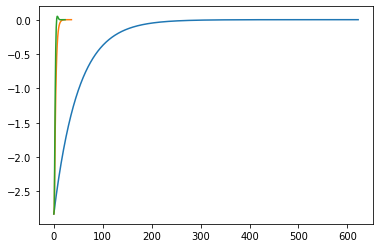

In [ ]:
x = np.random.rand()

xa = x
xb = x
xc = x
hista = []
histb = []
histc = []

alpha = 0.01
tol = 1e-5
sigma = 0.1
epsilon = 0.05

# SGD
g = 1
while abs(g) > tol:
  g = fp(xa)
  xa = xa - alpha * g
  hista.append(g)

# SGD w/1st order momentum
g = 1
gb = 0
while abs(g) > tol:
  g = fp(xb)
  xb = xb - alpha * g - sigma * gb
  gb = g
  histb.append(g)

# SGD w/2nd order momentum
g = 1
gb = 0
gbb = 0
while abs(g) > tol:
  g = fp(xc)
  xc = xc - alpha * g - sigma * gb - epsilon * gbb
  gb = g
  gbb = gb
  histc.append(g)

fig, ax = plt.subplots(1)
ax.plot(hista)
ax.plot(histb)
ax.plot(histc)

print("SGD exited on epoch nº " + str(len(hista)))
print("SGD w/1st order momentum exited on epoch nº " + str(len(histb)))
print("SGD w/2nd order momentum exited on epoch nº " + str(len(histc)))

Vemos que el SGD con momento de segundo orden converge más rápido.

# 2 - Backpropagation y regla de la cadena

## Diferenciación analítica

a) Automatic Differentiation: para el grafo de cómputo que se muestra en la
siguiente imagen, con a=1, b=2 y c=3, calcular el valor final de Y y la
derivada de Y respecto a cada una de las entradas (a, b y c). Para hacer el
cálculo, primero realizar el paso forward y luego utilizar backpropagation con
la regla de la cadena.

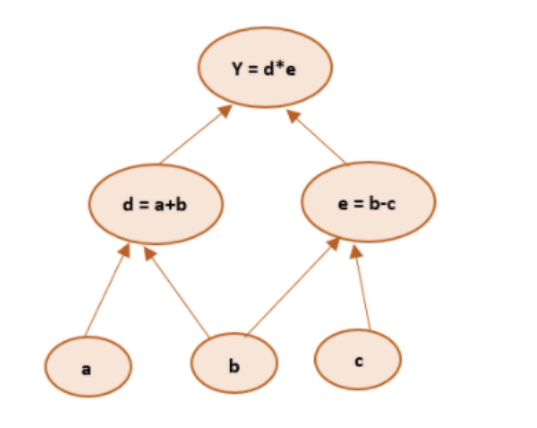

In [4]:
# Forward
a = 1
b = 2
c = 3
d = a + b
e = b - c
Y = d * e
print("d = " + str(d))
print("e = " + str(e))
print("Y = " + str(Y))

d = 3
e = -1
Y = -3


In [6]:
# Backward
dY_dd = e
dY_de = d

dd_da = 1
dd_db = 1
de_db = 1
de_dc = -1

dY_da = dY_dd * dd_da
dY_db = dY_dd * dd_db + dY_de * de_db
dY_dc = dY_de * de_dc

print("dY_da = " + str(dY_da))
print("dY_db = " + str(dY_db))
print("dY_dc = " + str(dY_dc))

dY_da = -1
dY_db = 2
dY_dc = -3


## Diferenciación numérica

b) Numerical Differentiation: para el grafo de cómputo que se muestra en la
siguiente imagen, con a=1, b=2 y c=3, utilizar la siguiente expresión y un
valor de h pequeño para calcular las derivadas respecto de cada entrada.
Comparar los resultados con los obtenidos en el punto (a)

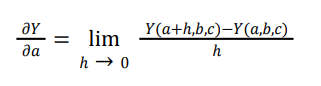

In [8]:
def calcY(a,b,c):
  d = a + b
  e = b - c
  Y = d * e
  return Y

In [10]:
h = 0.001

In [11]:
print("dY_da ~= " + str((calcY(a+h,b,c)-calcY(a,b,c))/h))
print("dY_db ~= " + str((calcY(a,b+h,c)-calcY(a,b,c))/h))
print("dY_dc ~= " + str((calcY(a,b,c+h)-calcY(a,b,c))/h))

dY_da ~= -0.9999999999998899
dY_db ~= 2.0009999999999195
dY_dc ~= -2.9999999999996696


# 3 - Deep Learning y Regularización

## Creación del Dataset

a) Crear un dataset sintético con 10,000 muestras a partir de la siguiente
expresión, donde N es una normal de media cero y desvío 0.2. Utilizar 80%
de los datos para entrenamiento y 20% de los datos para testing.
𝑦 = (𝑥 − 2)**2 + 3 + 𝑁

In [228]:
samples = 10000
N = np.random.normal(loc=0.0, scale=0.2, size=samples)
x = np.random.uniform(low=-5.0, high=9.0, size=samples)
y = (x-2)**2 + 3 + N

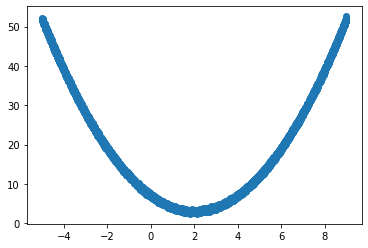

In [229]:
plt.scatter(x,y)

In [230]:
# Normalize dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x.reshape(-1,1))
x = x.reshape((10000,))
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1,1))
y = y.reshape((10000,))

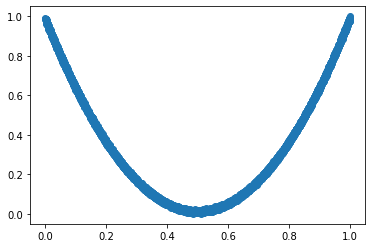

In [232]:
plt.scatter(x,y);

In [173]:
idx_split = round(samples*0.8)
x_train = x[:idx_split]
y_train = y[:idx_split]
x_test = x[idx_split:]
y_test = y[idx_split:]

In [174]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000,)
(8000,)
(2000,)
(2000,)


## Mini-batch SGD

b) Suponer que se tiene un modelo, tal que la relación entre la salida y la
entrada está dada por la ecuación presentada a continuación. Suponiendo
que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los
pesos w1, w2 y w3 tal que minimizan el ECM (Error Cuadrático Medio) (el
ECM es la función de costo para este problema), ¿cuál sería la regla de
actualización de cada parámetro?. Implementar el algoritmo en Python (usar
mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar ECM
sobre dataset de entrenamiento y dataset de testing.

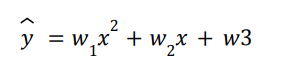

Final train loss: 0.08693554158872507
Final test loss: 0.08595128778397447


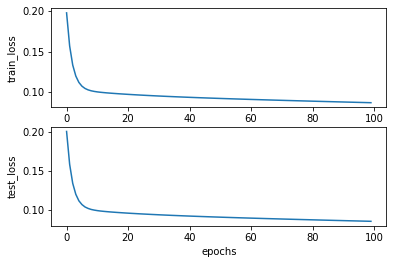

In [175]:
alpha = 0.001
epochs = 100
n_batches = 100
n_samples = x_train.shape[0]

w = np.random.rand(3)

train_loss_hist = []
test_loss_hist = []

x_test_vec = np.vstack((x_test**2, x_test, x_test*0+1))

for epoch in range(epochs):
    # Shuffle samples and create batches
    batch_size = int(n_samples / n_batches)
    idx = np.random.permutation(n_samples)
    x_sh = x_train[idx]
    y_sh = y_train[idx]

    train_loss = np.zeros(n_batches)
    test_loss = np.zeros(n_batches)
  
    for i in range(n_batches):
        bx = x_sh[i * batch_size:(i + 1) * batch_size]
        by = y_sh[i * batch_size:(i + 1) * batch_size]

        bx_vec =  np.vstack((bx**2, bx, bx*0+1))

        # Forward
        yp = w @ bx_vec
        yp_test = w @ x_test_vec

        # Errors
        e = by - yp
        train_loss[i] = (e**2).mean()

        e_test = (y_test - yp_test)
        test_loss[i] = (e_test**2).mean()

        # Backward
        grad = -2 * np.mean(e * bx_vec, axis=1)

        # Weights update
        w = w - alpha * grad

    train_loss_hist.append(train_loss.mean())
    test_loss_hist.append(test_loss.mean())

fig, axs = plt.subplots(2)
axs[0].plot(train_loss_hist)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('train_loss')
axs[1].plot(test_loss_hist)
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('test_loss')

print("Final train loss: " + str(train_loss_hist[-1]))
print("Final test loss: " + str(test_loss_hist[-1]))

En cada epoch, los parámetros w se actualizan según la ecuación (w = w - alpha * grad) donde el gradiente de la función de costo depende del promedio de los errores de estimación del batch multiplicados por las derivadas parciales para cada parámetro (x^2, x, 1).

## Mini-batch SGD + regularización L2

c)  Ahora se le agrega regularización l2 a la función de costo, ¿cómo cambia la
regla de actualización de cada parámetro?. Implementar el algoritmo en
Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y
reportar ECM sobre dataset de entrenamiento y dataset de testing.
Seleccionar manualmente los parámetros para el learning rate y para el
coeficiente de regularización.


Final train loss: 0.08024432538968201
Final test loss: 0.0793075066845426


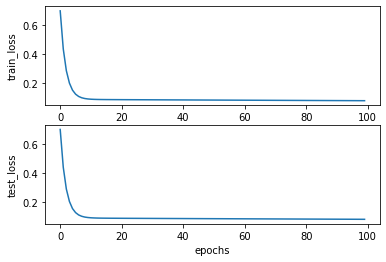

In [176]:
alpha = 0.001
lbd = 0.03
epochs = 100
n_batches = 100
n_samples = x_train.shape[0]

w = np.random.rand(3)

train_loss_hist = []
test_loss_hist = []

x_test_vec = np.vstack((x_test**2, x_test, x_test*0+1))

for epoch in range(epochs):
    # Shuffle samples and create batches
    batch_size = int(n_samples / n_batches)
    idx = np.random.permutation(n_samples)
    x_sh = x_train[idx]
    y_sh = y_train[idx]

    train_loss = np.zeros(n_batches)
    test_loss = np.zeros(n_batches)
  
    for i in range(n_batches):
        bx = x_sh[i * batch_size:(i + 1) * batch_size]
        by = y_sh[i * batch_size:(i + 1) * batch_size]

        bx_vec =  np.vstack((bx**2, bx, bx*0+1))

        # Forward
        yp = w @ bx_vec
        yp_test = w @ x_test_vec

        # Errors
        e = by - yp
        train_loss[i] = (e**2).mean()

        e_test = (y_test - yp_test)
        test_loss[i] = (e_test**2).mean()

        # Backward
        grad = -2 * np.mean(e * bx_vec, axis=1)

        # Weights update
        w = (1 - lbd * alpha / batch_size) * w - alpha * grad

    train_loss_hist.append(train_loss.mean())
    test_loss_hist.append(test_loss.mean())

fig, axs = plt.subplots(2)
axs[0].plot(train_loss_hist)
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('train_loss')
axs[1].plot(test_loss_hist)
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('test_loss')

print("Final train loss: " + str(train_loss_hist[-1]))
print("Final test loss: " + str(test_loss_hist[-1]))

## Optimización de HP con Grid Search

d)  En lugar de seleccionar manualmente el learning rate y el coeficiente de
regularización, utiliza el 10% del dataset de entrenamiento como dataset de
validación. Hacer una búsqueda (grid search) de los hiper parámetros que
mejor resultado te dan para el ECM sobre el dataset de validación. Luego,
utiliza los mejores hiper parámetros para reportar las métricas sobre el
dataset de testing.

In [221]:
# 70/10/20 (train/val/test)
idx_split_train = round(samples*0.7)
idx_split_val = round(samples*0.8)
x_train = x[:idx_split_train]
y_train = y[:idx_split_train]
x_val = x[idx_split_train:idx_split_val]
y_val = y[idx_split_train:idx_split_val]
x_test = x[idx_split_val:]
y_test = y[idx_split_val:]

In [222]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(7000,)
(7000,)
(1000,)
(1000,)
(2000,)
(2000,)


In [223]:
# Encapsule mini-batch SGD w/l2 regularization

def mb_sgd_l2(x_t, y_t, x_v, y_v, alpha, lbd, n_epochs, n_batches):

  n_samples = x_t.shape[0]

  w = np.random.rand(3)

  train_loss_hist = []
  val_loss_hist = []

  x_v_vec = np.vstack((x_v**2, x_v, x_v*0+1))

  for epoch in range(n_epochs):
      # Shuffle samples and create batches
      batch_size = int(n_samples / n_batches)
      idx = np.random.permutation(n_samples)
      x_sh = x_t[idx]
      y_sh = y_t[idx]

      train_loss = np.zeros(n_batches)
      val_loss = np.zeros(n_batches)
    
      for i in range(n_batches):
          bx = x_sh[i * batch_size:(i + 1) * batch_size]
          by = y_sh[i * batch_size:(i + 1) * batch_size]

          bx_vec =  np.vstack((bx**2, bx, bx*0+1))

          # Forward
          yp = w @ bx_vec
          yp_v = w @ x_v_vec

          # Errors
          e = by - yp
          train_loss[i] = (e**2).mean()

          e_test = (y_v - yp_v)
          val_loss[i] = (e_test**2).mean()

          # Backward
          grad = -2 * np.mean(e * bx_vec, axis=1)

          # Weights update
          w = (1 - lbd * alpha / batch_size) * w - alpha * grad

      train_loss_hist.append(train_loss.mean())
      val_loss_hist.append(val_loss.mean())
    
  return train_loss_hist, val_loss_hist, w

In [243]:
# Grid search
alphas = np.linspace(0.0001, 0.001, 10)
lambdas = np.linspace(1e-7, 0.001, 10)

losses = np.zeros((len(alphas), len(lambdas)))

for i,alpha in enumerate(alphas):
  for j,lbd in enumerate(lambdas):
    t_loss, v_loss, w = mb_sgd_l2(x_train, y_train, x_val, y_val, alpha, lbd, n_epochs=100, n_batches=100)
    losses[i][j] = v_loss[-1]

In [246]:
losses

array([[2.9506286 , 2.44836506, 2.69868406, 2.84278014, 2.44114834,
        2.74165847, 2.24889329, 2.27351026, 2.45361402, 2.83309512],
       [0.3720246 , 0.37980718, 0.4241051 , 0.39645311, 0.39242672,
        0.32755128, 0.37905592, 0.31944558, 0.39479018, 0.35567236],
       [0.08551883, 0.07908164, 0.07584584, 0.07830327, 0.08456136,
        0.08506283, 0.0788736 , 0.07929763, 0.08416174, 0.08337397],
       [0.04373407, 0.04298578, 0.04328555, 0.04235529, 0.04273338,
        0.04300411, 0.04316019, 0.04270279, 0.04279167, 0.0429587 ],
       [0.03867457, 0.03837412, 0.03842421, 0.0384276 , 0.03827245,
        0.03847472, 0.03825569, 0.03853405, 0.0384168 , 0.03855554],
       [0.03784554, 0.03787807, 0.03789347, 0.03795135, 0.03800302,
        0.03794869, 0.03808467, 0.03797764, 0.03808652, 0.03799639],
       [0.03843437, 0.03815945, 0.03835624, 0.03806966, 0.03806078,
        0.03821416, 0.03814576, 0.0381993 , 0.03818236, 0.03814673],
       [0.03864103, 0.03941264, 0.0387006

Text(33.0, 0.5, 'Alpha')

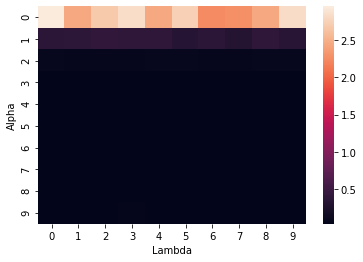

In [247]:
import seaborn as sns
ax = sns.heatmap(losses)
ax.set_xlabel("Lambda")
ax.set_ylabel("Alpha")

In [251]:
i,j = np.unravel_index(np.argmin(losses), losses.shape)
print("Min loss: " + str(losses[i][j]))
print("Alpha: " + str(alphas[i]))
print("Lambda: " + str(lambdas[j]))
opt_alpha = alphas[i]
opt_lambda = lambdas[j]

Min loss: 0.03784554036279844
Alpha: 0.0006000000000000001
Lambda: 1e-07


In [252]:
# Train set metrics
t_loss, test_loss, test_w = mb_sgd_l2(x_train, y_train, x_test, y_test, opt_alpha, opt_lambda, n_epochs=100, n_batches=100)

Test set MSE: 0.039574787192970674


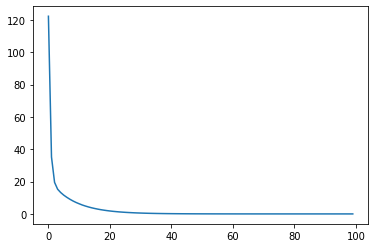

In [253]:
print("Test set MSE: " + str(test_loss[-1]))
plt.plot(test_loss);

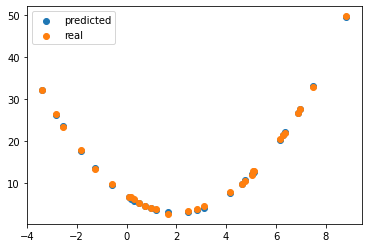

In [257]:
# Visualize examples
n = 30
x_stest = x_test[:n]
y_stest = y_test[:n]

x_stest_vec = np.vstack((x_stest**2, x_stest, x_stest*0+1))
yp_stest = test_w @ x_stest_vec

plt.scatter(x_stest, yp_stest, label="predicted")
plt.scatter(x_stest, y_stest, label="real")
plt.legend();

## Deep Learning con PyTorch

e) En los puntos (b), (c) y (d) utilizaste Python para hacer la implementación y el
modelo ya estaba establecido. En este punto se pide hacer una
implementación con Deep Learning en PyTorch. Las redes neuronales, si
tienen la suficiente cantidad de layers y se están utilizando las funciones de
activación adecuadas, son capaces de representar cualquier función para
mapear la entrada a la salida. Proponer una arquitectura, agregar
regularización mediante la técnica dropout, entrenar la red neuronal, buscar
los mejores hiper parámetros y presentar el ECM sobre el dataset de testing.
Comparar los resultados obtenidos en (e) con los puntos anteriores.


In [258]:
import torch
from torch.utils.data import Dataset, DataLoader

In [266]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        super().__init__()
        self.X = X
        self.Y = Y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [267]:
training = CustomDataset(x_train, y_train)
validation = CustomDataset(x_val, y_val)
testing = CustomDataset(x_test, y_test)

In [362]:
batch_size = 100
training_dataloader = DataLoader(training, batch_size, shuffle=True)
validation_dataloader = DataLoader(validation, batch_size, shuffle=True)
test_dataloader = DataLoader(testing, batch_size, shuffle=True)

In [413]:
class NNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=1, out_features=40, bias=True)
        self.relu_1 = torch.nn.LeakyReLU()
        self.dropout_1 = torch.nn.Dropout(0.01)
        self.linear_2 = torch.nn.Linear(in_features=40, out_features=20, bias=True)
        self.relu_2 = torch.nn.LeakyReLU()
        self.dropout_2 = torch.nn.Dropout(0.01)
        self.linear_3 = torch.nn.Linear(in_features=20, out_features=1, bias=True)

    def forward(self, x):
        z1 = self.linear_1(x)
        a1 = self.relu_1(z1)
        d1 = self.dropout_1(a1)
        z2 = self.linear_2(d1)
        a2 = self.relu_2(z2)
        d2 = self.dropout_2(a2)
        y  = self.linear_3(d2)
        return y

In [414]:
nnet = NNet()
print(nnet)

NNet(
  (linear_1): Linear(in_features=1, out_features=40, bias=True)
  (relu_1): LeakyReLU(negative_slope=0.01)
  (dropout_1): Dropout(p=0.01, inplace=False)
  (linear_2): Linear(in_features=40, out_features=20, bias=True)
  (relu_2): LeakyReLU(negative_slope=0.01)
  (dropout_2): Dropout(p=0.01, inplace=False)
  (linear_3): Linear(in_features=20, out_features=1, bias=True)
)


In [415]:
criterion = torch.nn.MSELoss(reduction='mean') # Loss function
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.0005) # Optimizer

In [416]:
for epoch in range(500):

    training_loss = 0
    nnet.train()

    for i, data in enumerate(training_dataloader):

        # batch
        x, y = data
        x = x.float().reshape(-1,1)
        y = y.float().reshape(-1,1)

        # set gradient to zero
        optimizer.zero_grad()

        # forward 
        y_hat = nnet(x)

        # loss
        loss = criterion(y_hat, y)

        # backward
        loss.backward()

        # update of parameters
        optimizer.step()

        # compute metrics and statistics
        training_loss += loss.item()
    
    nnet.eval()
    with torch.no_grad():
      validation_loss = 0

      for i, data in enumerate(validation_dataloader):
          # batch
          x, y = data
          x = x.float().reshape(-1,1)
          y = y.float().reshape(-1,1)

          # forward 
          y_hat = nnet(x)

          # loss
          loss = criterion(y_hat, y)

          # accumulate data
          validation_loss += loss.item()

      if epoch%20 == 0:
        print(f"Epoch = {epoch} | loss = {training_loss / len(training)} | val_loss = {validation_loss / len(validation_dataloader)}")

Epoch = 0 | loss = 5.696497314453125 | val_loss = 520.4502838134765
Epoch = 20 | loss = 0.13502471610477992 | val_loss = 11.819180583953857
Epoch = 40 | loss = 0.03180706696850913 | val_loss = 1.7008008122444154
Epoch = 60 | loss = 0.019477604704243798 | val_loss = 0.4854486554861069
Epoch = 80 | loss = 0.0160712582554136 | val_loss = 0.21597638875246047
Epoch = 100 | loss = 0.012338235829557691 | val_loss = 0.11163119524717331
Epoch = 120 | loss = 0.01312512800523213 | val_loss = 0.0797356314957142
Epoch = 140 | loss = 0.011306890615395138 | val_loss = 0.06587683446705342
Epoch = 160 | loss = 0.010251090799059186 | val_loss = 0.07412885315716267
Epoch = 180 | loss = 0.010230799142803464 | val_loss = 0.07044582664966584
Epoch = 200 | loss = 0.00933390273792403 | val_loss = 0.08273445144295692
Epoch = 220 | loss = 0.009317813004766192 | val_loss = 0.06922942139208317
Epoch = 240 | loss = 0.009365832188299724 | val_loss = 0.08310718983411788
Epoch = 260 | loss = 0.00936721493942397 | val

In [433]:
test_loss = 0

for i, data in enumerate(test_dataloader):
    # batch
    x, y = data
    x = x.float().reshape(-1,1)
    y = y.float().reshape(-1,1)

    # forward 
    y_hat = nnet(x)

    # loss
    test_loss += criterion(y_hat, y).item()

test_loss = test_loss / len(test_dataloader)

print("DL test loss: " + str(test_loss))

DL test loss: 0.04568685386329889


Se probó el entrenamiento de la red con diferentes valores de learning_rate, dropout y cantidad de features de las capas.

Comparación de resultados:

*   SGD test loss = 0.086
*   SGD + L2 reg. = 0.079
*   SGD + L2 reg. + grid search = 0.039
*   Deep Learning = 0.045



f) Para el punto (e), ¿qué función de activación seleccionaste y por qué? Para
la función que hayas seleccionado, explica sus características, su forward y
su backward.

Seleccioné una función de activación del tipo **LeakyRELU** para evitar el problema de vanishing gradients si la entrada de esas capas llegara a ser negativa.

Esa fx de activación es muy utilizada ya que otorga alinealidad al modelo sin complicar el cálculo del back-propagation.

f (x) = x si x > 0 o 0.01*x si x <= 0
f'(x) = 1 si x > 0 o 0.01   si x <= 0